In [24]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../')

from utils.cleaning import int2rom
from utils.sample_data import load_odyssey
from nltk.corpus import wordnet, words
import nltk
import re
import json
import numpy as np
import pandas as pd
import itertools as its
from  itertools import permutations as PNR

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Zipf time series

[Autocorrelation](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)?

In [41]:
text_words,text_sents=load_odyssey()
text_words = [w for w in text_words if w.isalpha()]

In [26]:
counts = dict.fromkeys(set(text_words), 0)
for w in text_words:
    for k in counts.keys():
        if w == k:
            counts[k]+=1
            
axis = [w for w,r in sorted(counts.items(), key=lambda item: item[1],reverse=1)] #from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
axis_map = {w:n for n,w in enumerate(axis)}


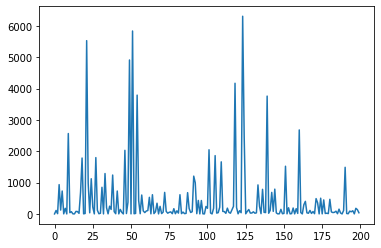

In [46]:
axis = [w for w,r in sorted(counts.items(), key=lambda item: item[1],reverse=1) if w.isalpha()] #from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
axis_map = {w:n for n,w in enumerate(axis)}
time_series1 = []
for w in text_words:
    if w in axis_map:
        time_series1.append(axis_map[w])
        
st=200
plt.plot(range(st), time_series1[:st])